In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tej_key
tej_key = 'XzWbBV3gZ8xTs3Cro3RF7OvtqnW0uJ'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key 
os.environ['TEJAPI_BASE'] = api_base

In [74]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2020-01-01', 
                    end = '2022-07-31',  # 選取 2021 年年初已上市的股票
                    mkt_bd_e = ['TSE','OTC'], # 以上市櫃之股票
                    stktp_e = 'Common Stock',  # 普通股
                    main_ind_c = 'M2300 電子工業') # 僅要電子工業
pool

Currently used TEJ API key call quota 102/1000 (10.2%)
Currently used TEJ API key data quota 1504140/10000000 (15.04%)


['1471',
 '1582',
 '2059',
 '2301',
 '2302',
 '2303',
 '2305',
 '2308',
 '2312',
 '2313',
 '2314',
 '2316',
 '2317',
 '2321',
 '2323',
 '2324',
 '2327',
 '2328',
 '2329',
 '2330',
 '2331',
 '2332',
 '2337',
 '2338',
 '2340',
 '2342',
 '2344',
 '2345',
 '2347',
 '2349',
 '2351',
 '2352',
 '2353',
 '2354',
 '2355',
 '2356',
 '2357',
 '2359',
 '2360',
 '2362',
 '2363',
 '2364',
 '2365',
 '2367',
 '2368',
 '2369',
 '2373',
 '2374',
 '2375',
 '2376',
 '2377',
 '2379',
 '2380',
 '2382',
 '2383',
 '2385',
 '2387',
 '2388',
 '2390',
 '2392',
 '2393',
 '2395',
 '2397',
 '2399',
 '2401',
 '2402',
 '2404',
 '2405',
 '2406',
 '2408',
 '2409',
 '2412',
 '2413',
 '2414',
 '2415',
 '2417',
 '2419',
 '2420',
 '2421',
 '2423',
 '2424',
 '2425',
 '2426',
 '2427',
 '2428',
 '2429',
 '2430',
 '2431',
 '2433',
 '2434',
 '2436',
 '2438',
 '2439',
 '2440',
 '2441',
 '2442',
 '2444',
 '2448',
 '2449',
 '2450',
 '2451',
 '2453',
 '2454',
 '2455',
 '2456',
 '2457',
 '2458',
 '2459',
 '2460',
 '2461',
 '2462',
 

In [75]:
len(pool)

407

In [79]:
import TejToolAPI

start_time = pd.Timestamp('2021-01-01')
end_time = pd.Timestamp('2022-07-31')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文', '常續ROE', '營業毛利率', '營運產生現金流量', '投資產生現金流量','負債比率','t8107','t8111','t8133','t8134','isni','r609','r611'],
                                   transfer_to_chinese = True)
data['自由現金流量'] = data['營運產生現金流量_A'] + data['投資產生現金流量_A']
data['獲利含金量']=data['營運產生現金流量_A'] /data['淨利潤_A']*100
data['短期營收年增率'] = ((data['近3月累計營收_千元'] / data['去年近3月累計營收_千元']) - 1) * 100
data['長期營收年增率'] = ((data['近12月累計營收_千元'] / data['去年近12月累計營收_千元']) - 1) * 100
data.drop(columns = ['營運產生現金流量_A', '投資產生現金流量_A','淨利潤_A','近3月累計營收_千元','去年近3月累計營收_千元','近12月累計營收_千元','去年近12月累計營收_千元'], inplace = True)  # 移除欄位

Currently used TEJ API key call quota 194/1000 (19.4%)
Currently used TEJ API key data quota 2531822/10000000 (25.32%)


In [80]:
data

,股票代碼,日期,主產業別_中文,營業毛利率_A,負債比率_A,期末收帳天數_A,期末售貨天數_A,常續ROE_A,自由現金流量,獲利含金量,短期營收年增率,長期營收年增率
0,1471,2021-01-04,M2300 電子工業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1471,2021-01-05,M2300 電子工業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1471,2021-01-06,M2300 電子工業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1471,2021-01-07,M2300 電子工業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1471,2021-01-08,M2300 電子工業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151121,9912,2022-07-25,M2300 電子工業,33.42,44.98,40.15,241.37,-1.11,-51966.0,1533.291219,-6.115183,3.241378
151122,9912,2022-07-26,M2300 電子工業,33.42,44.98,40.15,241.37,-1.11,-51966.0,1533.291219,-6.115183,3.241378
151123,9912,2022-07-27,M2300 電子工業,33.42,44.98,40.15,241.37,-1.11,-51966.0,1533.291219,-6.115183,3.241378
151124,9912,2022-07-28,M2300 電子工業,33.42,44.98,40.15,241.37,-1.11,-51966.0,1533.291219,-6.115183,3.241378


In [81]:
# 依不同產業分類，計算出產業平均 ROE
industry_ROE_ave = ROE_1Y_data.groupby('主產業別_中文')['常續ROE_A'].transform('mean')

# 加入 '產業平均ROE' 欄位
ROE_1Y_data['產業平均ROE'] = industry_ROE_ave
 
ROE_1Y_data

,股票代碼,日期,主產業別_中文,常續ROE_A,產業平均ROE


In [82]:
# 取出近三年(2023-12-29, 2022-12-30,2021-12-30)的資料
data_last_3Y = data[data['日期'].isin([ '2021-12-30'])].reset_index(drop = True)

# 計算公司三年平均的 ROE
ROE_3Y_ave = data_last_3Y.groupby('股票代碼')['常續ROE_A'].mean()

# 從 Series 轉成 Dataframe，並重新命名欄位
ROE_3Y_ave = pd.DataFrame(ROE_3Y_ave).rename(columns = {'常續ROE_A': '3年平均ROE'})

ROE_3Y_ave

,3年平均ROE
股票代碼,
1471,-11.47
1582,2.98
2059,12.50
2301,10.29
2302,3.59
...,...
8215,16.89
8249,1.63
8261,24.83


In [83]:
set_2 = set(ROE_3Y_ave[ROE_3Y_ave['3年平均ROE'] > 15].index)  # 篩選符合選股條件的公司
set_2

{'2327',
 '2330',
 '2345',
 '2368',
 '2376',
 '2377',
 '2379',
 '2382',
 '2383',
 '2395',
 '2404',
 '2409',
 '2428',
 '2441',
 '2454',
 '2455',
 '2458',
 '2465',
 '2467',
 '2481',
 '2492',
 '3006',
 '3014',
 '3017',
 '3023',
 '3026',
 '3030',
 '3033',
 '3034',
 '3042',
 '3048',
 '3051',
 '3090',
 '3130',
 '3209',
 '3257',
 '3312',
 '3413',
 '3443',
 '3481',
 '3515',
 '3530',
 '3533',
 '3545',
 '3557',
 '3563',
 '3669',
 '4952',
 '4961',
 '4968',
 '4989',
 '5234',
 '5269',
 '5434',
 '5471',
 '6189',
 '6202',
 '6278',
 '6281',
 '6409',
 '6412',
 '6438',
 '6531',
 '6669',
 '6706',
 '6756',
 '8016',
 '8046',
 '8081',
 '8112',
 '8150',
 '8215',
 '8261'}

In [84]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
GM_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '營業毛利率_A']]

GM_1Y_data

,股票代碼,日期,主產業別_中文,營業毛利率_A


In [85]:
industry_GM_ave = GM_1Y_data.groupby('主產業別_中文')['營業毛利率_A'].transform('mean')  

# 加入 '產業平均毛利率' 欄位
GM_1Y_data['產業平均毛利率'] = industry_GM_ave

GM_1Y_data

,股票代碼,日期,主產業別_中文,營業毛利率_A,產業平均毛利率


In [86]:
set_3 = set(GM_1Y_data[GM_1Y_data['營業毛利率_A'] > GM_1Y_data['產業平均毛利率']]['股票代碼'])  # 篩選符合選股條件的公司
set_3

set()

In [87]:
# 取出最近1年及前2年度的資料
cash_data = data[data['日期'].isin(['2021-12-30'])].reset_index(drop = True)  

# 取出股票基本資料與自由現金流量方便觀察
cash_data = cash_data[['股票代碼', '日期', '自由現金流量']]  

cash_data

,股票代碼,日期,自由現金流量
0,1471,2021-12-30,-100826.0
1,1582,2021-12-30,17385.0
2,2059,2021-12-30,391359.0
3,2301,2021-12-30,7505958.0
4,2302,2021-12-30,-33862.0
...,...,...,...
391,8215,2021-12-30,284444.0
392,8249,2021-12-30,-1417600.0
393,8261,2021-12-30,170879.0
394,8271,2021-12-30,-69425.0


In [88]:
cash_data['近三年自由現金流'] =  cash_data['自由現金流量'].sum()
cash_data['指標'] = cash_data['近三年自由現金流'] -0

In [89]:
cash_data

,股票代碼,日期,自由現金流量,近三年自由現金流,指標
0,1471,2021-12-30,-100826.0,-21695417.0,-21695417.0
1,1582,2021-12-30,17385.0,-21695417.0,-21695417.0
2,2059,2021-12-30,391359.0,-21695417.0,-21695417.0
3,2301,2021-12-30,7505958.0,-21695417.0,-21695417.0
4,2302,2021-12-30,-33862.0,-21695417.0,-21695417.0
...,...,...,...,...,...
391,8215,2021-12-30,284444.0,-21695417.0,-21695417.0
392,8249,2021-12-30,-1417600.0,-21695417.0,-21695417.0
393,8261,2021-12-30,170879.0,-21695417.0,-21695417.0
394,8271,2021-12-30,-69425.0,-21695417.0,-21695417.0


In [90]:
set_4 = set(cash_data[cash_data['指標'] > 1]['股票代碼'])  # 篩選符合選股條件的公司
set_4

set()

In [91]:
len(set_4)

0

In [92]:
# 取出最近1年及前2年度的資料
liabilities_data = data[data['日期'].isin(['2021-12-30'])].reset_index(drop = True)  

# 取出股票基本資料與自由現金流量方便觀察
liabilities_data = liabilities_data[['股票代碼', '日期', '負債比率_A']]  

liabilities_data

,股票代碼,日期,負債比率_A
0,1471,2021-12-30,23.37
1,1582,2021-12-30,49.71
2,2059,2021-12-30,17.94
3,2301,2021-12-30,61.35
4,2302,2021-12-30,18.82
...,...,...,...
391,8215,2021-12-30,58.80
392,8249,2021-12-30,45.31
393,8261,2021-12-30,41.55
394,8271,2021-12-30,34.34


In [93]:
liabilities_data['負債比率<50%'] = liabilities_data['負債比率_A'] < 50

In [94]:
set_5 = set(liabilities_data[liabilities_data['負債比率<50%']]['股票代碼']) # 篩選符合選股條件的公司
set_5

{'1471',
 '1582',
 '2059',
 '2302',
 '2303',
 '2305',
 '2308',
 '2316',
 '2323',
 '2328',
 '2329',
 '2330',
 '2332',
 '2337',
 '2340',
 '2342',
 '2344',
 '2349',
 '2351',
 '2354',
 '2355',
 '2357',
 '2359',
 '2360',
 '2363',
 '2365',
 '2369',
 '2374',
 '2376',
 '2383',
 '2388',
 '2390',
 '2393',
 '2395',
 '2399',
 '2401',
 '2402',
 '2405',
 '2406',
 '2408',
 '2409',
 '2412',
 '2417',
 '2419',
 '2420',
 '2423',
 '2425',
 '2426',
 '2428',
 '2431',
 '2433',
 '2434',
 '2436',
 '2438',
 '2440',
 '2441',
 '2450',
 '2451',
 '2454',
 '2455',
 '2456',
 '2458',
 '2459',
 '2461',
 '2462',
 '2468',
 '2471',
 '2472',
 '2474',
 '2476',
 '2478',
 '2480',
 '2482',
 '2483',
 '2484',
 '2485',
 '2486',
 '2488',
 '2489',
 '2491',
 '2492',
 '2493',
 '2495',
 '2498',
 '3002',
 '3003',
 '3005',
 '3006',
 '3008',
 '3014',
 '3015',
 '3016',
 '3019',
 '3022',
 '3024',
 '3025',
 '3026',
 '3027',
 '3030',
 '3031',
 '3034',
 '3035',
 '3038',
 '3041',
 '3042',
 '3049',
 '3050',
 '3054',
 '3057',
 '3059',
 '3060',
 

In [95]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
DSO_3Y_data = data_last_3Y[['股票代碼', '日期', '主產業別_中文', '期末售貨天數_A']]
DPO_3Y_data =data_last_3Y[['股票代碼', '日期', '主產業別_中文', '期末收帳天數_A']]
DSO_3Y_data

,股票代碼,日期,主產業別_中文,期末售貨天數_A
0,1471,2021-12-30,M2300 電子工業,145.43
1,1582,2021-12-30,M2300 電子工業,49.52
2,2059,2021-12-30,M2300 電子工業,110.74
3,2301,2021-12-30,M2300 電子工業,90.14
4,2302,2021-12-30,M2300 電子工業,117.92
...,...,...,...,...
391,8215,2021-12-30,M2300 電子工業,68.40
392,8249,2021-12-30,M2300 電子工業,39.61
393,8261,2021-12-30,M2300 電子工業,71.70
394,8271,2021-12-30,M2300 電子工業,81.09


In [96]:
DPO_3Y_data

,股票代碼,日期,主產業別_中文,期末收帳天數_A
0,1471,2021-12-30,M2300 電子工業,71.01
1,1582,2021-12-30,M2300 電子工業,133.23
2,2059,2021-12-30,M2300 電子工業,91.69
3,2301,2021-12-30,M2300 電子工業,88.39
4,2302,2021-12-30,M2300 電子工業,87.30
...,...,...,...,...
391,8215,2021-12-30,M2300 電子工業,59.76
392,8249,2021-12-30,M2300 電子工業,54.96
393,8261,2021-12-30,M2300 電子工業,84.32
394,8271,2021-12-30,M2300 電子工業,52.04


In [97]:
industry_DSO_ave = DSO_3Y_data.groupby('主產業別_中文')['期末售貨天數_A'].transform('mean')  
industry_DPO_ave = DPO_3Y_data.groupby('主產業別_中文')['期末收帳天數_A'].transform('mean')  

DSO_3Y_data['產業平均售貨天數'] = industry_DSO_ave
DPO_3Y_data['產業平均收帳天數'] = industry_DPO_ave

DSO_3Y_data

,股票代碼,日期,主產業別_中文,期末售貨天數_A,產業平均售貨天數
0,1471,2021-12-30,M2300 電子工業,145.43,225.265473
1,1582,2021-12-30,M2300 電子工業,49.52,225.265473
2,2059,2021-12-30,M2300 電子工業,110.74,225.265473
3,2301,2021-12-30,M2300 電子工業,90.14,225.265473
4,2302,2021-12-30,M2300 電子工業,117.92,225.265473
...,...,...,...,...,...
391,8215,2021-12-30,M2300 電子工業,68.40,225.265473
392,8249,2021-12-30,M2300 電子工業,39.61,225.265473
393,8261,2021-12-30,M2300 電子工業,71.70,225.265473
394,8271,2021-12-30,M2300 電子工業,81.09,225.265473


In [98]:
set_6 = set(DSO_3Y_data[DSO_3Y_data['期末售貨天數_A'] < DSO_3Y_data['產業平均售貨天數']]['股票代碼'])  # 篩選符合選股條件的公司
set_7=set(DPO_3Y_data[DPO_3Y_data['期末收帳天數_A'] < DPO_3Y_data['產業平均收帳天數']]['股票代碼'])  # 篩選符合選股條件的公司

In [99]:
set_6

{'1471',
 '1582',
 '2059',
 '2301',
 '2302',
 '2303',
 '2305',
 '2308',
 '2312',
 '2313',
 '2314',
 '2316',
 '2317',
 '2321',
 '2323',
 '2324',
 '2327',
 '2328',
 '2329',
 '2330',
 '2331',
 '2332',
 '2337',
 '2338',
 '2340',
 '2342',
 '2344',
 '2345',
 '2347',
 '2349',
 '2351',
 '2352',
 '2353',
 '2354',
 '2355',
 '2356',
 '2357',
 '2359',
 '2360',
 '2362',
 '2363',
 '2364',
 '2365',
 '2367',
 '2368',
 '2369',
 '2373',
 '2374',
 '2375',
 '2376',
 '2377',
 '2379',
 '2380',
 '2382',
 '2383',
 '2385',
 '2387',
 '2388',
 '2392',
 '2393',
 '2395',
 '2397',
 '2399',
 '2401',
 '2402',
 '2404',
 '2405',
 '2406',
 '2408',
 '2409',
 '2412',
 '2413',
 '2414',
 '2415',
 '2417',
 '2419',
 '2420',
 '2421',
 '2424',
 '2425',
 '2426',
 '2428',
 '2429',
 '2430',
 '2431',
 '2433',
 '2434',
 '2436',
 '2438',
 '2439',
 '2440',
 '2441',
 '2444',
 '2449',
 '2450',
 '2451',
 '2453',
 '2454',
 '2455',
 '2456',
 '2457',
 '2458',
 '2459',
 '2460',
 '2461',
 '2462',
 '2464',
 '2465',
 '2466',
 '2467',
 '2468',
 

In [100]:
set_7

{'1471',
 '2303',
 '2305',
 '2308',
 '2312',
 '2317',
 '2321',
 '2323',
 '2324',
 '2327',
 '2329',
 '2330',
 '2331',
 '2337',
 '2338',
 '2344',
 '2345',
 '2347',
 '2349',
 '2351',
 '2352',
 '2353',
 '2356',
 '2357',
 '2359',
 '2362',
 '2363',
 '2364',
 '2365',
 '2373',
 '2376',
 '2377',
 '2379',
 '2380',
 '2382',
 '2388',
 '2390',
 '2392',
 '2395',
 '2399',
 '2401',
 '2404',
 '2405',
 '2408',
 '2409',
 '2412',
 '2413',
 '2414',
 '2415',
 '2417',
 '2419',
 '2420',
 '2424',
 '2425',
 '2427',
 '2429',
 '2430',
 '2431',
 '2433',
 '2442',
 '2444',
 '2450',
 '2451',
 '2453',
 '2454',
 '2455',
 '2457',
 '2458',
 '2464',
 '2465',
 '2471',
 '2477',
 '2480',
 '2482',
 '2488',
 '2491',
 '2495',
 '2498',
 '3003',
 '3006',
 '3008',
 '3014',
 '3017',
 '3018',
 '3019',
 '3022',
 '3024',
 '3025',
 '3026',
 '3027',
 '3033',
 '3034',
 '3035',
 '3036',
 '3038',
 '3041',
 '3043',
 '3045',
 '3046',
 '3047',
 '3048',
 '3049',
 '3050',
 '3054',
 '3057',
 '3059',
 '3094',
 '3130',
 '3189',
 '3209',
 '3231',
 

In [101]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
SR_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '短期營收年增率']]
LR_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '長期營收年增率']]
SR_1Y_data

,股票代碼,日期,主產業別_中文,短期營收年增率


In [102]:
# 合併兩個資料框以便比較短期和長期營收年增率
merged_data = pd.merge(SR_1Y_data, LR_1Y_data, on='股票代碼', suffixes=('_short', '_long'))

# 篩選出短期營收年增率大於長期營收年增率的公司
短期超長期營收增長 = merged_data[merged_data['短期營收年增率'] > merged_data['長期營收年增率']]

In [103]:
set_8 = set(短期超長期營收增長['股票代碼'])
set_8

set()

In [104]:
# 取出股票基本資料與 Earnings Quality 資料方便觀察
EQ_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '獲利含金量']]

EQ_1Y_data

,股票代碼,日期,主產業別_中文,獲利含金量


In [105]:
獲利含金量優良= EQ_1Y_data[EQ_1Y_data['獲利含金量'] > 80]

In [106]:
set_9 = set(獲利含金量優良['股票代碼'])

In [107]:
set_9

set()

In [108]:
tickers = list(set_1 & set_2 & set_3 & set_4 & set_5 & set_6 & set_7 & set_8 & set_9)
tickers

[]

In [109]:
len(tickers)

0

In [124]:
import tejapi

tejapi.ApiConfig.api_key = tej_key
tejapi.ApiConfig.ignoretz = api_base

ticker_data = tejapi.get('TWN/APISTOCK',  # 證券屬性資料表
                  coid = tickers,
                  opts = {'columns':['coid', 'stk_name', 'main_ind_c']},
                  chinese_column_name = True,
                  paginate = True)

ticker_data

,公司簡稱,證券名稱,主產業別(中)
None,,,
0,2330,台積電,M2300 電子工業
1,2454,聯發科,M2300 電子工業
2,2455,全新,M2300 電子工業
3,2458,義隆,M2300 電子工業
4,3014,聯陽,M2300 電子工業
5,3034,聯詠,M2300 電子工業
6,3592,瑞鼎,M2300 電子工業
7,4952,凌通,M2300 電子工業
8,4961,天鈺,M2300 電子工業


In [138]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
os.environ['TEJAPI_KEY'] = "ab0aChJaHZYJXVpENhmMQylbwTWO4a"
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"

In [139]:
from zipline.finance import slippage, commission
from zipline.api import order_target, record, symbol, set_benchmark, set_commission, set_slippage, attach_pipeline, pipeline_output
import matplotlib.pyplot as plt
from zipline import run_algorithm
from zipline.sources.TEJ_Api_Data import get_universe
from zipline.data import bundles
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.data import TWEquityPricing
from zipline.pipeline.filters import StaticAssets
from zipline.pipeline.mixins import SingleInputMixin
from zipline.pipeline.factors import RSI
from zipline.utils.math_utils import nanmean
from numpy import abs, clip, diff, inf
from numexpr import evaluate
start = '2021-01-01'
end = '2023-12-31'
StockList = ['2330','2454','2455','2458','3014','3034','3529','4952','4961','5234','6183','6531','6756','6799','8016','8081','8261']
tickers = ' '.join(StockList)
os.environ['ticker'] = tickers + ' IX0001'
os.environ['mdate'] = start + ' ' + end

In [140]:
# calendar------------------------------------------
calendar_name = 'TEJ_XTAI'  
# bundle_name---------------------------------------
bundle_name = 'tquant'

# 确保 zipline 数据包已导入
!zipline ingest -b tquant

[2024-06-13 07:39:53.274160] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]    
Currently used TEJ API key call quota 95/1000 (9.5%)
Currently used TEJ API key data quota 378398/10000000 (3.78%)
[2024-06-13 07:39:55.840247] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [142]:
class RSI2(SingleInputMixin, CustomFactor):
    window_length = 15
    inputs = (TWEquityPricing.close,)
    window_safe = True

    def compute(self, today, assets, out, closes):
        diffs = diff(closes[:-1][:], axis=0)
        ups = nanmean(clip(diffs, 0, inf), axis=0)
        downs = abs(nanmean(clip(diffs, -inf, 0), axis=0))
        return evaluate(
            "100 - (100 / (1 + (ups / downs)))",
            local_dict={'ups': ups, 'downs': downs},
            global_dict={},
            out=out,
        )

In [143]:
def make_pipeline(short, long):
    rsi_long = RSI(inputs=[TWEquityPricing.close], window_length=long)
    rsi_short = RSI(inputs=[TWEquityPricing.close], window_length=short)
    pre_rsi_long = RSI2(inputs=[TWEquityPricing.close], window_length=long+1)
    pre_rsi_short = RSI2(inputs=[TWEquityPricing.close], window_length=short+1)

    return Pipeline(columns={
        'curr_price': TWEquityPricing.close.latest,
        'RSI_short': rsi_short,
        'RSI_long': rsi_long,
        'pre_RSI_short': pre_rsi_short,
        'pre_RSI_long': pre_rsi_long
    })

In [144]:
def initialize(context):
    set_slippage(slippage.VolumeShareSlippage())
    set_commission(commission.PerShare(cost=0.001425 + 0.003 / 2))
    attach_pipeline(make_pipeline(6, 12), 'mystrats')
    set_benchmark(symbol('IX0001'))
    context.sym = symbol('2330')
    context.i = 0
    context.invested = False

In [145]:
def handle_data(context, data):
    out_dir = pipeline_output('mystrats')
    trailing_window = data.history(context.sym, 'price', 35, '1d')
    if trailing_window.isnull().values.any():
        return

    short_ema = talib.EMA(trailing_window.values, timeperiod=12)
    long_ema = talib.EMA(trailing_window.values, timeperiod=26)
    dif = short_ema - long_ema
    MACD = talib.EMA(dif, timeperiod=9)
    bar = dif - MACD

    for i in out_dir.index:
        sym = i.symbol
        RSI_short = out_dir.loc[i, 'RSI_short']
        RSI_long = out_dir.loc[i, "RSI_long"]
        pre_RSI_short = out_dir.loc[i, 'pre_RSI_short']
        pre_RSI_long = out_dir.loc[i, "pre_RSI_long"]
        curr_price = out_dir.loc[i, 'curr_price']

        cash_position = context.portfolio.cash
        stock_position = context.portfolio.positions[i].amount

        buy, sell = False, False

        print(f"Symbol: {sym}, RSI_short: {RSI_short}, RSI_long: {RSI_long}, dif[-2]: {dif[-2]}, MACD[-2]: {MACD[-2]}, dif[-1]: {dif[-1]}, MACD[-1]: {MACD[-1]}")

        if stock_position >= 0:
            if (RSI_short <= 30) and (dif[-2] < MACD[-2]) and (dif[-1] > MACD[-1]):
                order_target(i, 1000)
                buy = True
                print(f"Buying {sym} at {curr_price}")

        elif stock_position > 0:
            if (RSI_short >= 70) and (dif[-2] > MACD[-2]) and (dif[-1] < MACD[-1]):
                order_target(i, 0)
                sell = True
                print(f"Selling {sym} at {curr_price}")

        record(
            TSMC=data.current(symbol('2330'), 'close'),
            dif=dif[-1],
            MACD=MACD[-1],
            bar=bar[-1],
            buy=buy,
            sell=sell,
            RSI_short_2330=RSI_short,
            RSI_long_2330=RSI_long
        )

In [146]:
def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    import logbook
    logbook.StderrHandler().push_application()
    log = logbook.Logger('Algorithm')

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (TWD)')

    if 'MACD' in results and 'bar' in results:
        ax2.plot(results.index, results['MACD'], label='MACD', color='blue')
        colors = ["red" if bar > 0 else "green" for bar in results['bar']]
        ax2.bar(results.index, results['bar'], color=colors, alpha=0.5, width=0.4, label='MACD Bar')

        ax2.plot(
            results.index[results["buy"] == True],
            results.loc[results["buy"] == True, 'MACD'],
            '^',
            markersize=10,
            color='m',
            label='Buy Signal'
        )
        ax2.plot(
            results.index[results["sell"] == True],
            results.loc[results["sell"] == True, 'MACD'],
            'v',
            markersize=10,
            color='k',
            label='Sell Signal'
        )

        ax2.set_ylabel('MACD')
        ax2.legend(loc='upper left')

    else:
        msg = 'MACD and MACD Bar data not captured using record().'
        ax2.annotate(msg, xy=(0.1, 0.5))
        log.info(msg)

    if 'RSI_short_2330' in results:
        ax3.plot(results.index, results['RSI_short_2330'], label='RSI Short', color='orange')
        ax3.plot(results.index, results['RSI_long_2330'], label='RSI Long', color='purple')
        ax3.set_ylabel('RSI')
        ax3.legend(loc='upper right')

    else:
        msg = 'RSI data not captured using record().'
        ax3.annotate(msg, xy=(0.1, 0.5))
        log.info(msg)

    plt.tight_layout()
    plt.show()

Symbol: 2330, RSI_short: 62.5, RSI_long: 77.8688524590164, dif[-2]: 5.197471902407017, MACD[-2]: 1.632210053110978, dif[-1]: 5.514866720089344, MACD[-1]: 2.408741386506651
Symbol: 2454, RSI_short: 17.64705882352942, RSI_long: 66.08695652173913, dif[-2]: 5.197471902407017, MACD[-2]: 1.632210053110978, dif[-1]: 5.514866720089344, MACD[-1]: 2.408741386506651
Symbol: 2455, RSI_short: 40.99999999999994, RSI_long: 57.142857142857146, dif[-2]: 5.197471902407017, MACD[-2]: 1.632210053110978, dif[-1]: 5.514866720089344, MACD[-1]: 2.408741386506651
Symbol: 2458, RSI_short: 39.99999999999999, RSI_long: 58.536585365853654, dif[-2]: 5.197471902407017, MACD[-2]: 1.632210053110978, dif[-1]: 5.514866720089344, MACD[-1]: 2.408741386506651
Symbol: 3014, RSI_short: 20.312499999999943, RSI_long: 56.30252100840336, dif[-2]: 5.197471902407017, MACD[-2]: 1.632210053110978, dif[-1]: 5.514866720089344, MACD[-1]: 2.408741386506651
Symbol: 3034, RSI_short: 45.833333333333336, RSI_long: 77.27272727272728, dif[-2]

Symbol: 2330, RSI_short: 29.073752331160236, RSI_long: 46.10477568330424, dif[-2]: -10.89284098788795, MACD[-2]: -11.360117809974875, dif[-1]: -10.777413669185023, MACD[-1]: -11.243576981816904
Symbol: 2454, RSI_short: 18.181818181818187, RSI_long: 38.46153846153846, dif[-2]: -10.89284098788795, MACD[-2]: -11.360117809974875, dif[-1]: -10.777413669185023, MACD[-1]: -11.243576981816904
Symbol: 2455, RSI_short: 9.090909090909165, RSI_long: 20.952380952381034, dif[-2]: -10.89284098788795, MACD[-2]: -11.360117809974875, dif[-1]: -10.777413669185023, MACD[-1]: -11.243576981816904
Symbol: 2458, RSI_short: 35.526315789473685, RSI_long: 33.33333333333333, dif[-2]: -10.89284098788795, MACD[-2]: -11.360117809974875, dif[-1]: -10.777413669185023, MACD[-1]: -11.243576981816904
Symbol: 3014, RSI_short: 5.000000000000398, RSI_long: 32.50000000000004, dif[-2]: -10.89284098788795, MACD[-2]: -11.360117809974875, dif[-1]: -10.777413669185023, MACD[-1]: -11.243576981816904
Symbol: 3034, RSI_short: 10.204

Symbol: 2330, RSI_short: 47.69230769230769, RSI_long: 42.3841059602649, dif[-2]: -17.700625583697615, MACD[-2]: -21.992738713239117, dif[-1]: -17.116281327018612, MACD[-1]: -21.017447235995014
Symbol: 2454, RSI_short: 59.32203389830509, RSI_long: 58.156028368794324, dif[-2]: -17.700625583697615, MACD[-2]: -21.992738713239117, dif[-1]: -17.116281327018612, MACD[-1]: -21.017447235995014
Symbol: 2455, RSI_short: 56.43564356435645, RSI_long: 51.41242937853107, dif[-2]: -17.700625583697615, MACD[-2]: -21.992738713239117, dif[-1]: -17.116281327018612, MACD[-1]: -21.017447235995014
Symbol: 2458, RSI_short: 62.2641509433962, RSI_long: 53.27102803738319, dif[-2]: -17.700625583697615, MACD[-2]: -21.992738713239117, dif[-1]: -17.116281327018612, MACD[-1]: -21.017447235995014
Symbol: 3014, RSI_short: 76.92307692307699, RSI_long: 65.78947368421055, dif[-2]: -17.700625583697615, MACD[-2]: -21.992738713239117, dif[-1]: -17.116281327018612, MACD[-1]: -21.017447235995014
Symbol: 3034, RSI_short: 64.285

Symbol: 2330, RSI_short: 40.09290133913443, RSI_long: 32.56095222066092, dif[-2]: 9.71273816913174, MACD[-2]: 14.796761706245086, dif[-1]: 7.6763409287316335, MACD[-1]: 13.372677550742395
Symbol: 2454, RSI_short: 12.162162162162161, RSI_long: 22.147651006711413, dif[-2]: 9.71273816913174, MACD[-2]: 14.796761706245086, dif[-1]: 7.6763409287316335, MACD[-1]: 13.372677550742395
Symbol: 2455, RSI_short: 23.255813953488357, RSI_long: 14.024390243902502, dif[-2]: 9.71273816913174, MACD[-2]: 14.796761706245086, dif[-1]: 7.6763409287316335, MACD[-1]: 13.372677550742395
Symbol: 2458, RSI_short: 81.08108108108101, RSI_long: 42.592592592592624, dif[-2]: 9.71273816913174, MACD[-2]: 14.796761706245086, dif[-1]: 7.6763409287316335, MACD[-1]: 13.372677550742395
Symbol: 3014, RSI_short: 11.428571428571544, RSI_long: 50.0, dif[-2]: 9.71273816913174, MACD[-2]: 14.796761706245086, dif[-1]: 7.6763409287316335, MACD[-1]: 13.372677550742395
Symbol: 3034, RSI_short: 74.50980392156862, RSI_long: 60.6382978723

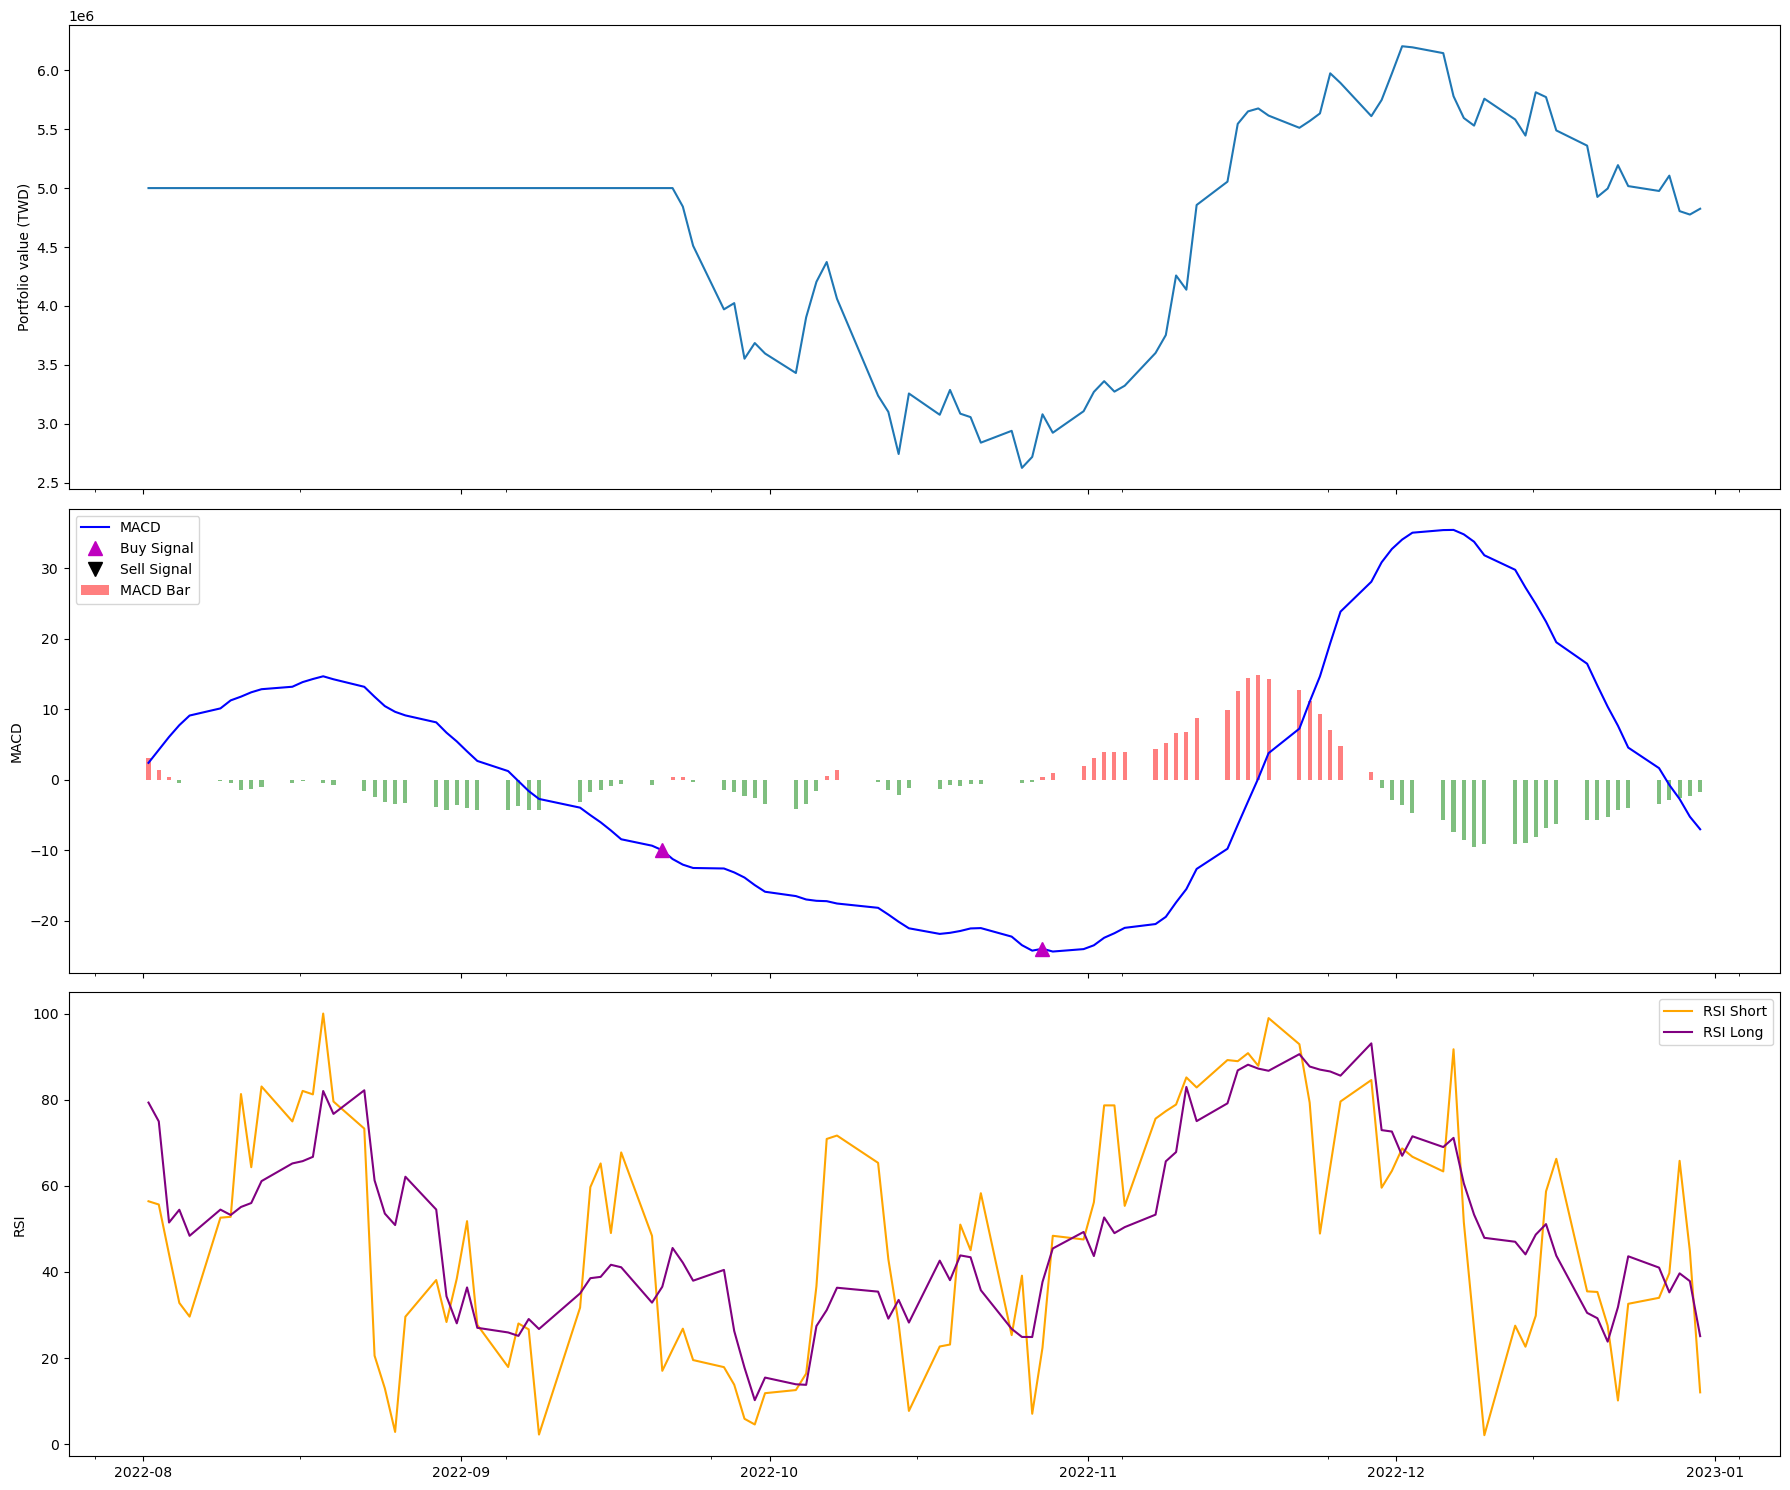

In [147]:
start_d = pd.Timestamp('2022-08-01', tz='utc')
end_date = pd.Timestamp('2022-12-31', tz='utc')
results = run_algorithm(
    start=start_d,
    end=end_date,
    initialize=initialize,
    bundle='tquant',
    analyze=analyze,
    capital_base=5e6,
    handle_data=handle_data)

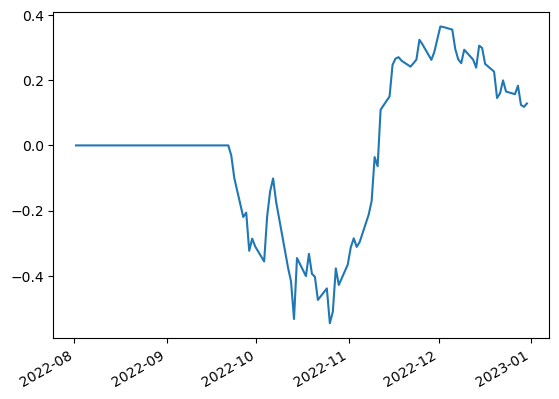

In [148]:
results.returns.cumsum().plot()
plt.show()


Start date,2022-08-01
End date,2022-12-30
Total months,5
,Backtest
Annual return,-7.988%
Cumulative returns,-3.505%
Annual volatility,88.049%
Sharpe ratio,0.34
Calmar ratio,-0.17
Stability,0.01
Max drawdown,-47.491%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.49,2022-09-20,2022-10-25,2022-11-14,39
1,23.02,2022-12-01,2022-12-29,NaT,NaN
2,6.08,2022-11-24,2022-11-28,2022-12-01,6
3,2.90,2022-11-17,2022-11-21,2022-11-24,6
4,NaN,NaT,NaT,NaT,NaN


Top 10 long positions of all time,max
sid,
IX0001,482.44%
3529,38.48%
2454,21.44%
2330,14.40%
3034,8.97%
8016,6.40%
6756,6.21%
6531,5.33%
8081,4.78%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
IX0001,482.44%
3529,38.48%
2454,21.44%
2330,14.40%
3034,8.97%
8016,6.40%
6756,6.21%
6531,5.33%
8081,4.78%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

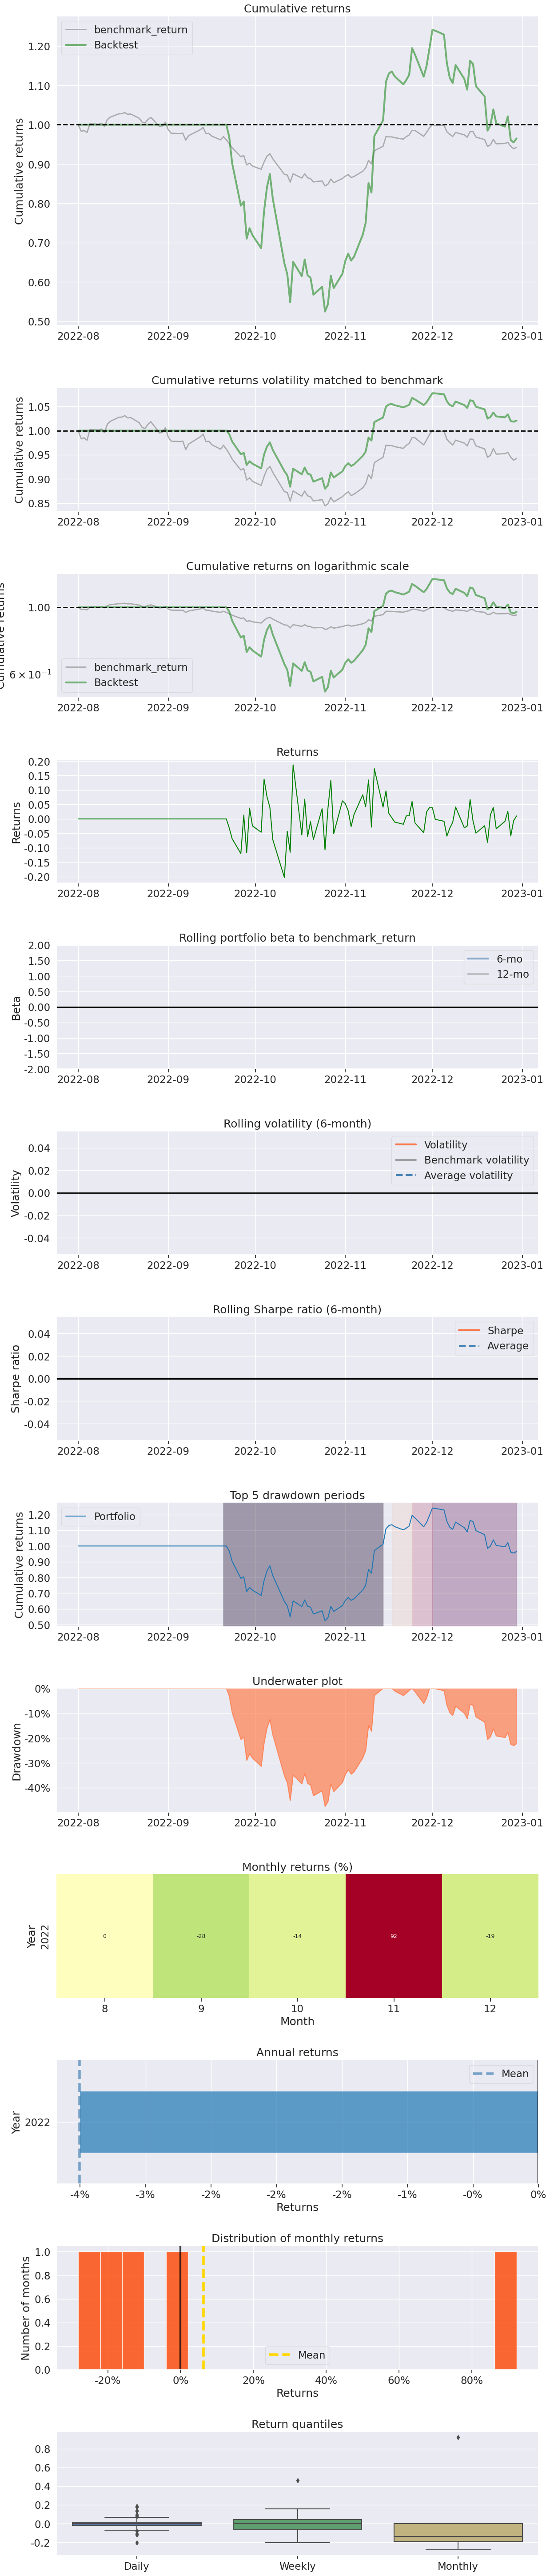

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei


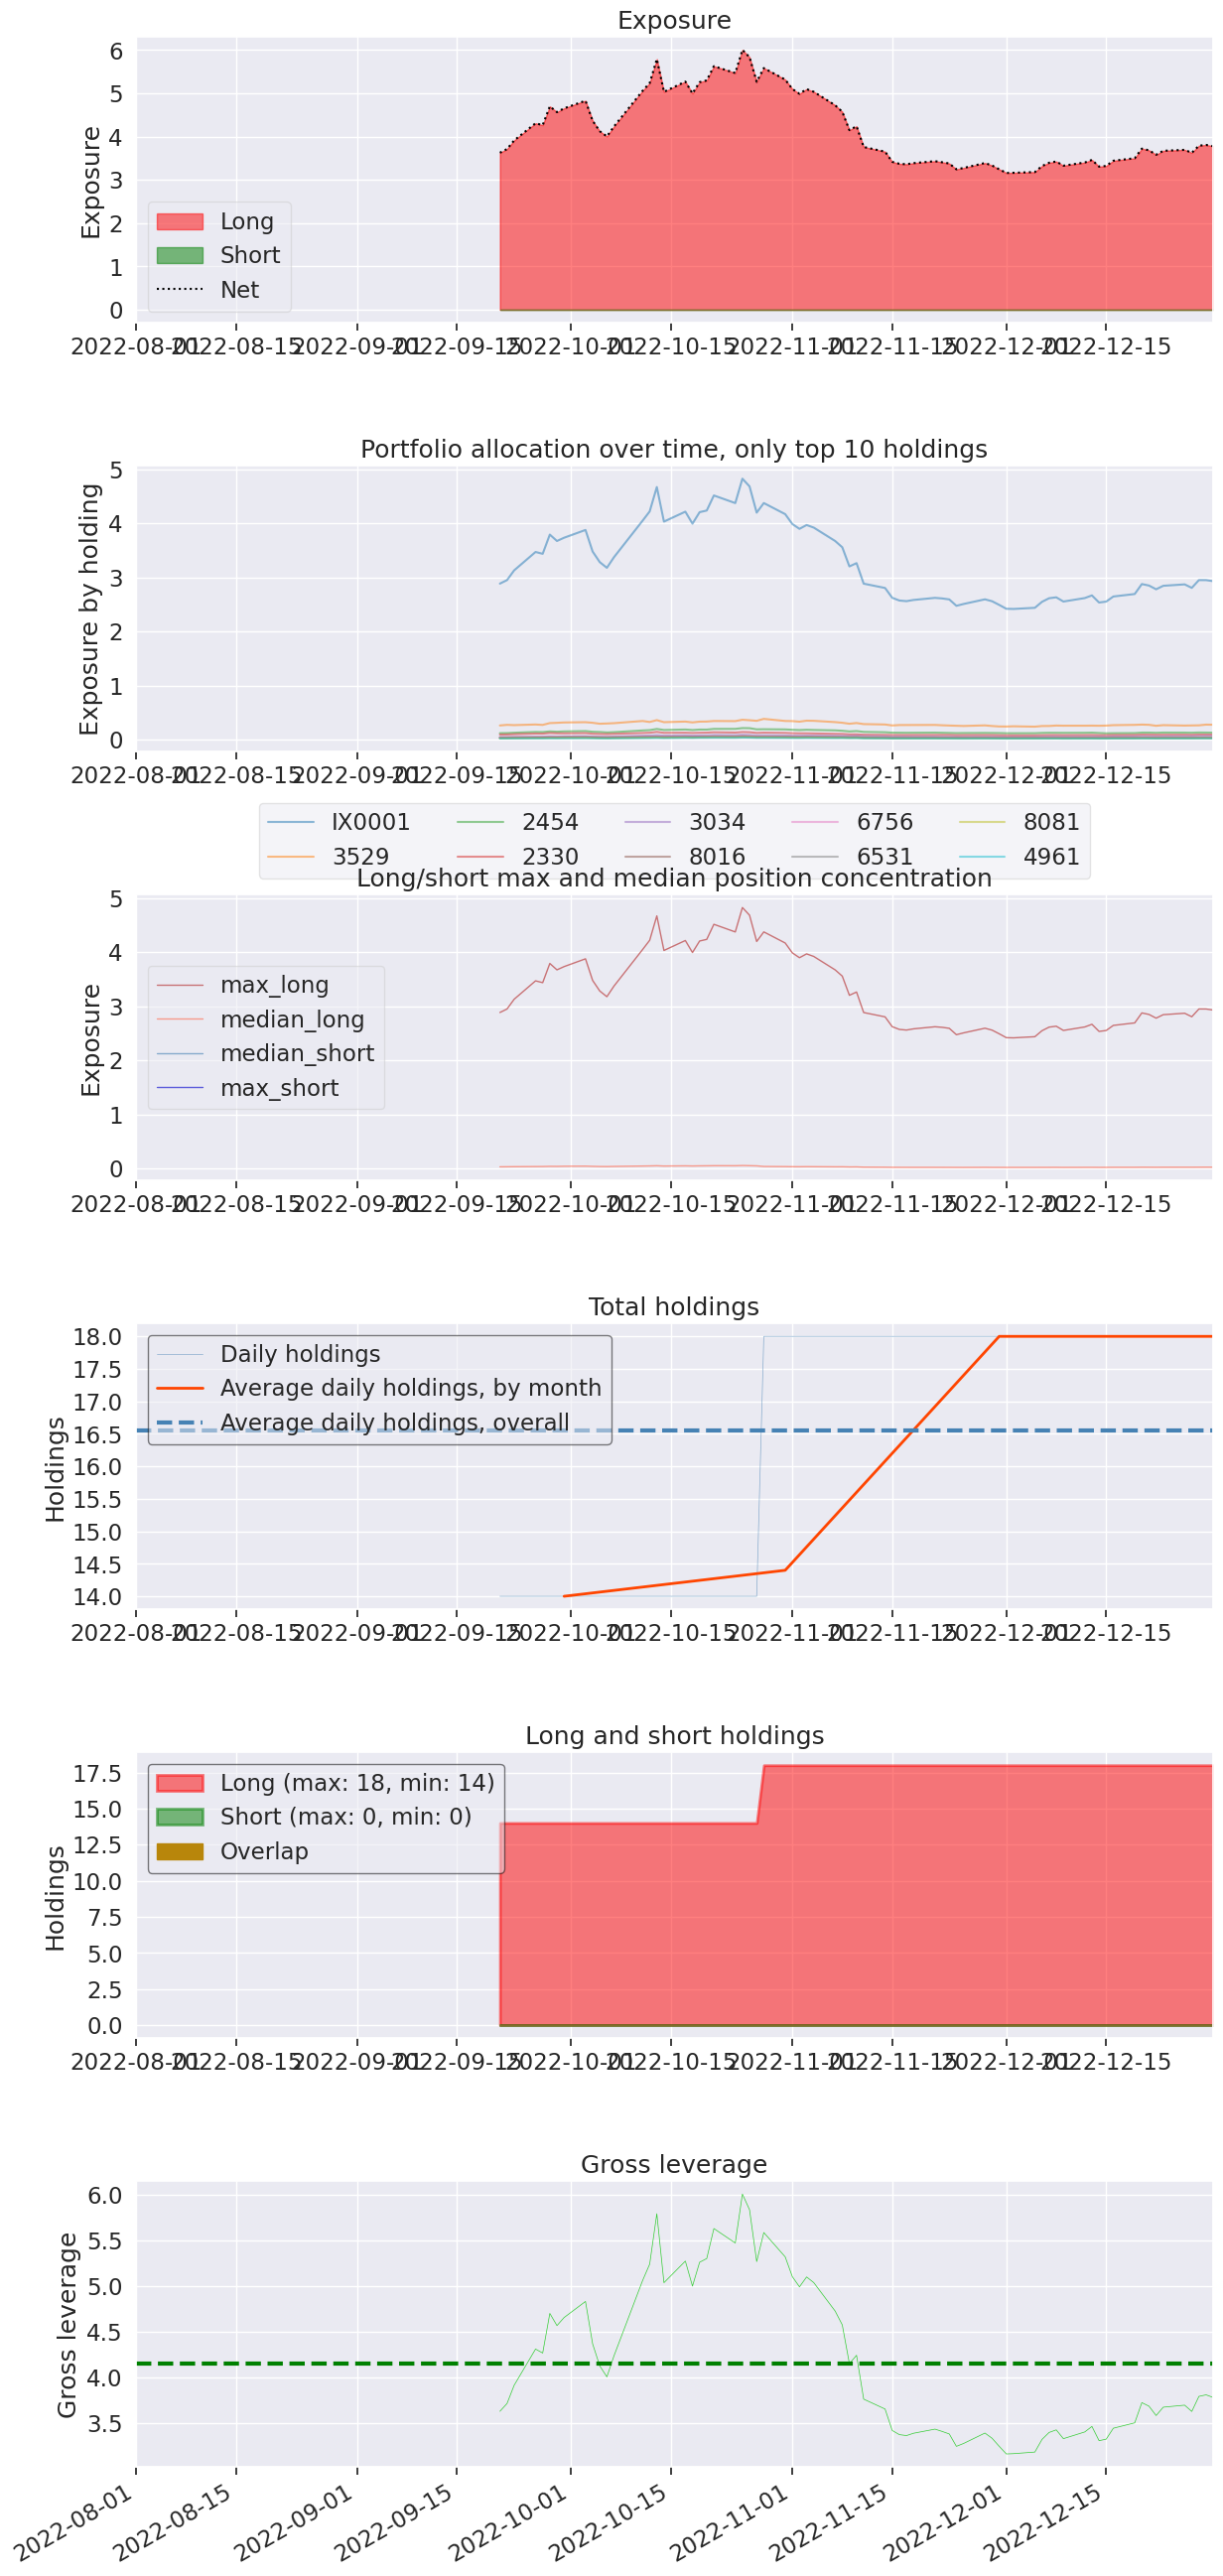

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

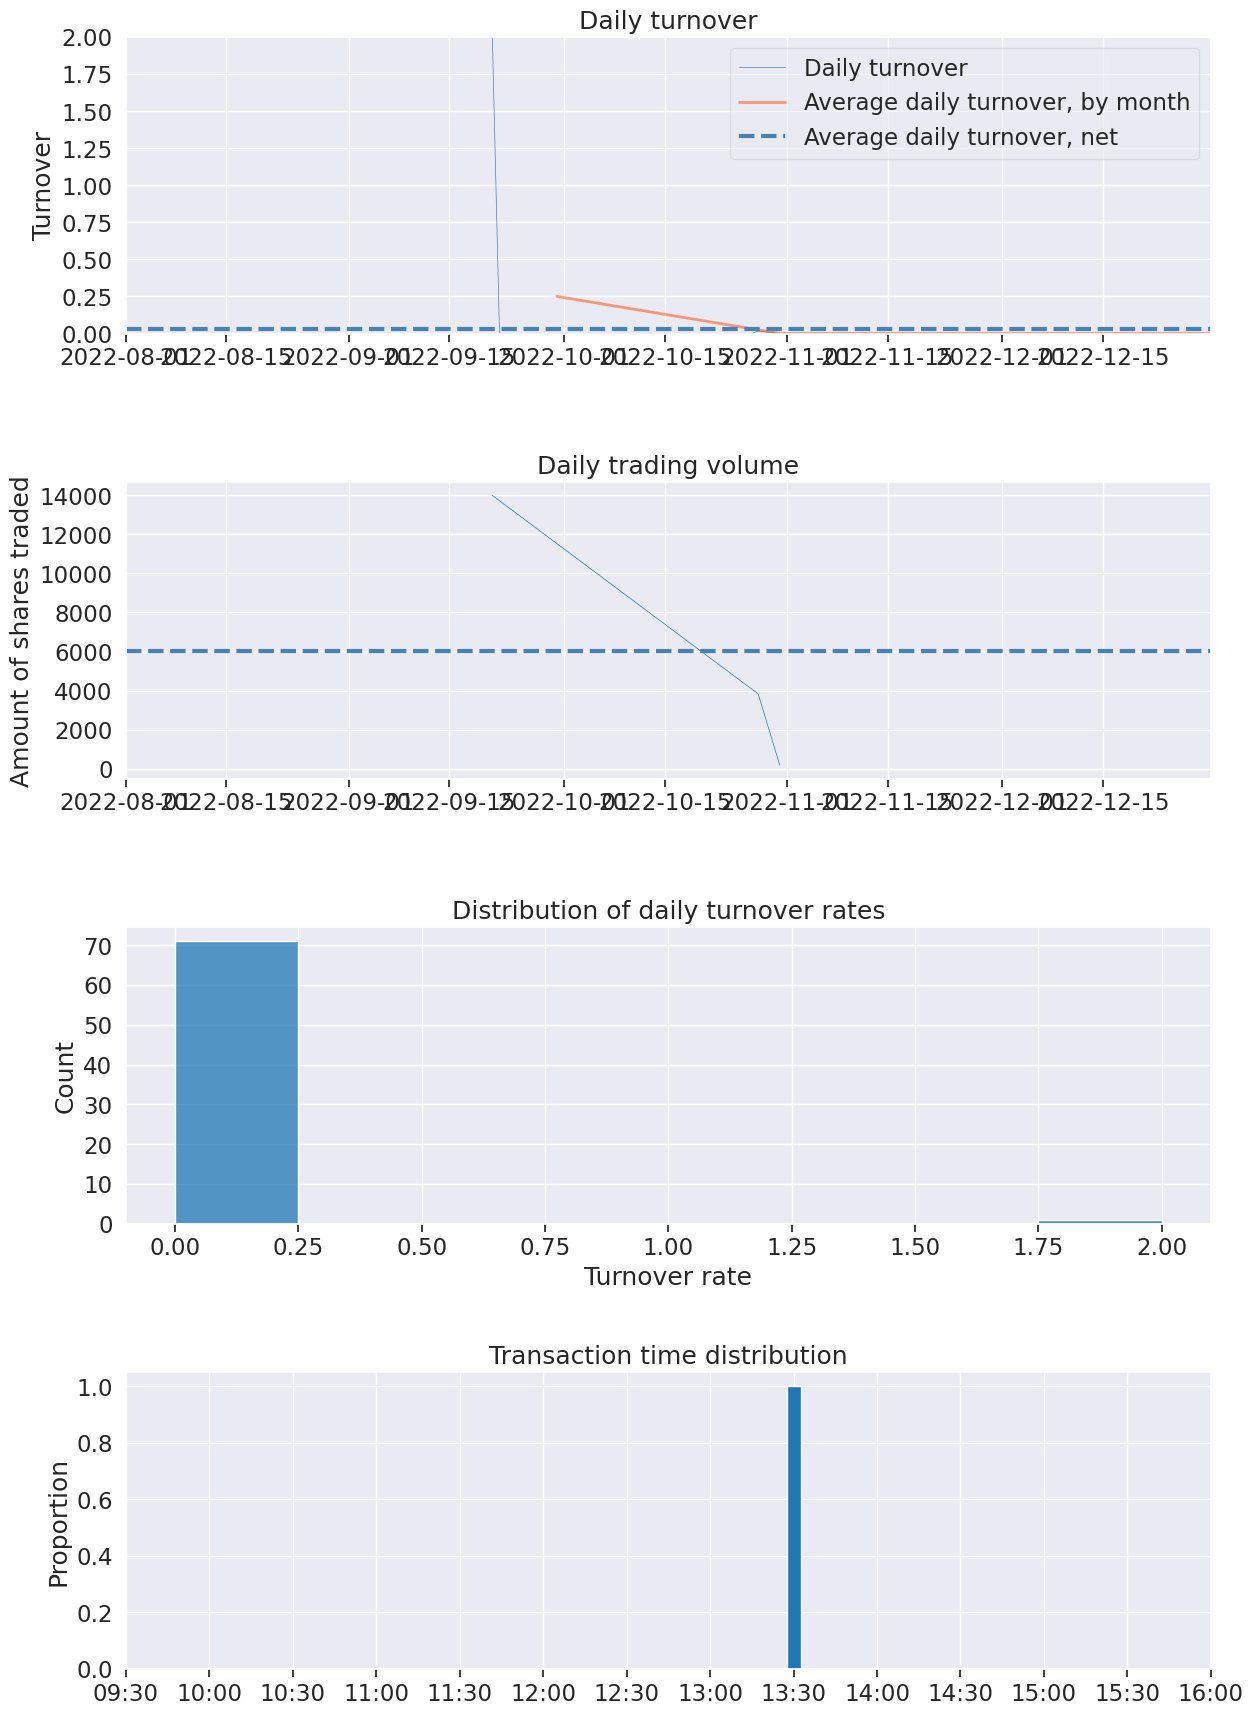

In [149]:
import pyfolio as pf
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# Creating a Full Tear Sheet
pf.create_full_tear_sheet(returns, positions = positions, transactions = transactions,
                          benchmark_rets = benchmark_rets,
                          round_trips=False)